In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('.\FuelConsumption.csv')

df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


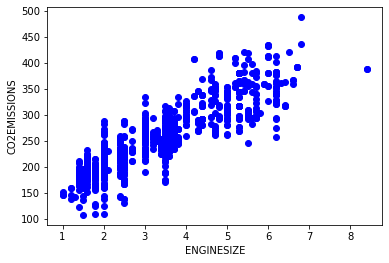

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [16]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print(train_x[:3])
print(train_x[-3:])
train_x_poly

[[2. ]
 [2.4]
 [1.5]]
[[3. ]
 [3.2]
 [3.2]]


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [17]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficients:  [[ 0.         47.40300828 -1.15704761]]
Intercept:  [112.61615234]


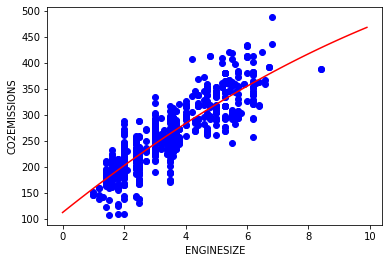

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX,yy,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [23]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("R-2 score: %.2f" % r2_score(test_y, test_y_))

R-2 score: 0.78


In [32]:
poly3 = PolynomialFeatures(degree=3)
train_x_3 = poly3.fit_transform(train_x)

lreg = linear_model.LinearRegression()
lreg.fit(train_x_3,train_y)

print("coefficients: ", lreg.coef_)
print("intercepts: ", lreg.intercept_)

coefficients:  [[ 0.         30.01370883  3.61941993 -0.39463359]]
intercepts:  [131.13487154]


In [33]:
print(train_x[:3])
print(train_x[-3:])
train_x_3

[[2. ]
 [2.4]
 [1.5]]
[[3. ]
 [3.2]
 [3.2]]


array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [34]:
test_x_3 = poly3.fit_transform(test_x)
test_y_ = lreg.predict(test_x_3)

print("R2-score :", r2_score(test_y, test_y_))

R2-score : 0.7766247078383148
